# Crop Yelds in the Sahel 
The crop production, e.g. maize and millet, in the Sahel region depends on the precipitations, the air temperature, in particular temperature values above 30°C, and the use of fertilizers such as nitrogen and manure. It may also depend on the increase of CO2 in the air. In this notebook we model of the dependency of the crop production on the said variables using a neural network with only one hidden layer. The problem can be classified as a regression problem where the relationship between the input variables and the dependent variable is non-linear. We start by reading the data from different countries in the Sahel region. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)
print("matplotlib version: %s"%mpl.__version__)

numpy version: 1.23.1
pandas version: 1.4.3
matplotlib version: 3.5.2


In [2]:
crop_yeld_df = pd.read_csv('data/crop_yelds_sahel.csv')
print('Number of records for Sahel: {0:d}'.format(len(crop_yeld_df)))

Number of records for Sahel: 202


In [3]:
crop_yeld_df[:3]

,Year,Area,pcp,tmp,tmp30sr,mean CO2,unc CO2,N [kg/ha],P2O5 [kg/ha],K2O [kg/ha],Manure applied to Soils [kg/ha],N + Manure [kg/ha],Maize [hg/ha],Millet [hg/ha]
0,1980,Burkina Faso,79.903095,26.477923,584.412288,338.76,0.12,0.45,0.69,0.41,3.2465,3.6965,9029,4871
1,1981,Burkina Faso,91.976429,25.869713,514.558300,340.12,0.12,1.08,1.55,0.84,3.6697,4.7497,8297,4801
2,1982,Burkina Faso,49.251481,27.276417,834.173411,341.48,0.12,1.15,1.59,0.87,3.9769,5.1269,8235,4853


In [10]:
crop_yeld_bf_df = crop_yeld_df[crop_yeld_df['Area'] == 'Burkina Faso']
print('Number of records for Burkina Faso: {0:d}'.format(len(crop_yeld_bf_df)))

Number of records for Burkina Faso: 31


In [11]:
crop_yeld_bf_df[:3]

,Year,Area,pcp,tmp,tmp30sr,mean CO2,unc CO2,N [kg/ha],P2O5 [kg/ha],K2O [kg/ha],Manure applied to Soils [kg/ha],N + Manure [kg/ha],Maize [hg/ha],Millet [hg/ha]
0,1980,Burkina Faso,79.903095,26.477923,584.412288,338.76,0.12,0.45,0.69,0.41,3.2465,3.6965,9029,4871
1,1981,Burkina Faso,91.976429,25.869713,514.558300,340.12,0.12,1.08,1.55,0.84,3.6697,4.7497,8297,4801
2,1982,Burkina Faso,49.251481,27.276417,834.173411,341.48,0.12,1.15,1.59,0.87,3.9769,5.1269,8235,4853


In [12]:
year_index = pd.Series(pd.date_range('1980', periods=31, freq="Y")).dt.year
year_index[:3]

0    1980
1    1981
2    1982
dtype: int64

In [13]:
crop_yeld_bf_df.drop(['Year'], axis=1, inplace=True)
crop_yeld_bf_df = crop_yeld_bf_df.set_index(year_index)
crop_yeld_bf_df[:3]

,Area,pcp,tmp,tmp30sr,mean CO2,unc CO2,N [kg/ha],P2O5 [kg/ha],K2O [kg/ha],Manure applied to Soils [kg/ha],N + Manure [kg/ha],Maize [hg/ha],Millet [hg/ha]
1980,Burkina Faso,79.903095,26.477923,584.412288,338.76,0.12,0.45,0.69,0.41,3.2465,3.6965,9029,4871
1981,Burkina Faso,91.976429,25.869713,514.558300,340.12,0.12,1.08,1.55,0.84,3.6697,4.7497,8297,4801
1982,Burkina Faso,49.251481,27.276417,834.173411,341.48,0.12,1.15,1.59,0.87,3.9769,5.1269,8235,4853


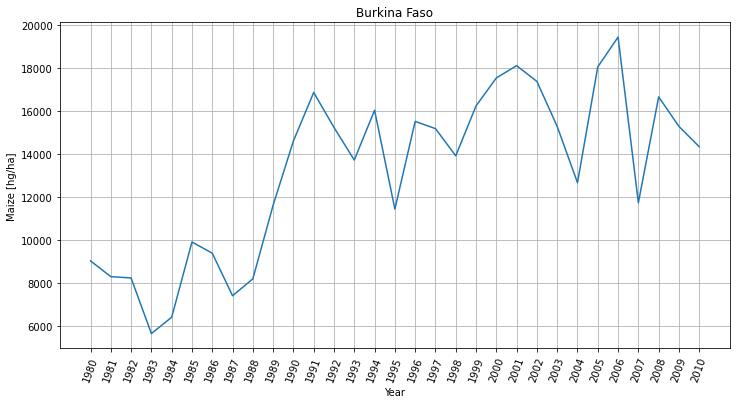

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_title('Burkina Faso')
ax.set_xlabel('Year')
ax.set_ylabel('Maize [hg/ha]');
ax.set_xticks(crop_yeld_bf_df.index)
ax.set_xticklabels(crop_yeld_bf_df.index, rotation=70)
ax.grid(True, which='both')
plt.plot(crop_yeld_bf_df['Maize [hg/ha]'])